In [1]:
# ShuffleSplit is one of the simplest cross validation techniques
# This cross validation technique will simply take a sample of the
# data for the number of iterations specified.

In [2]:
# Estimating the mean of a univariate dataset

In [3]:
import numpy as np

In [4]:
true_loc = 1000
true_scale = 10
N = 1000

In [5]:
dataset = np.random.normal(true_loc, true_scale, N)

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

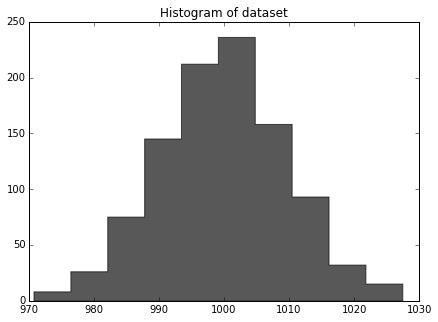

In [8]:
f, ax = plt.subplots(figsize=(7,5))
ax.hist(dataset, color='k', alpha=.65, histtype='stepfilled')
ax.set_title('Histogram of dataset')

In [9]:
# now take the first 1/2 of the dataset and guess the mean.

In [10]:
from sklearn import cross_validation
holdout_set = dataset[:500]
fitting_set = dataset[500:]

In [11]:
estimate = fitting_set[:N/2].mean()

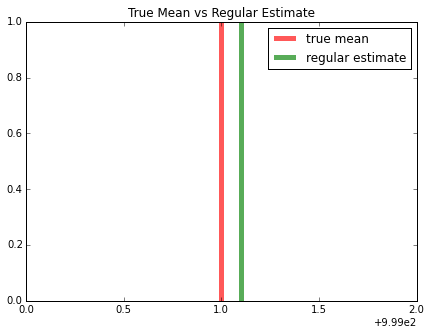

In [13]:
f,ax = plt.subplots(figsize=(7,5))
ax.set_title('True Mean vs Regular Estimate')
ax.vlines(true_loc, 0, 1, color='r', linestyle='-', lw=5,
          alpha=.65, label='true mean')
ax.vlines(estimate, 0, 1, color='g', linestyle='-', lw=5,
          alpha=.65, label='regular estimate')
ax.set_xlim(999, 1001)
ax.legend()

In [14]:
# now use shufflesplit to fit the estimator on several smaller
# datasets.

In [15]:
from sklearn.cross_validation import ShuffleSplit

In [16]:
shuffle_split = ShuffleSplit(len(fitting_set))

In [18]:
mean_p = []
for train, _ in shuffle_split:
    mean_p.append(fitting_set[train].mean())
shuf_estimate = np.mean(mean_p)

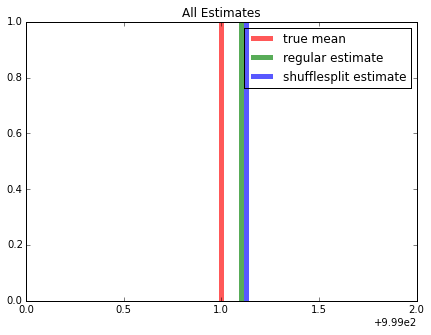

In [19]:
f, ax = plt.subplots(figsize=(7,5))
ax.vlines(true_loc, 0, 1, color='r', linestyle='-', lw=5,
          alpha=.65, label='true mean')
ax.vlines(estimate, 0, 1, color='g', linestyle='-', lw=5,
          alpha=.65, label='regular estimate')
ax.vlines(shuf_estimate, 0, 1, color='b', linestyle='-', lw=5,
          alpha=.65, label='shufflesplit estimate')
ax.set_title('All Estimates')
ax.set_xlim(999, 1001)
ax.legend(loc='best')

In [20]:
# we got an estimate that was similar to what we expected.